#**TITANIC SURVIVAL PREDICTION**

Problem Statement :

"Predict whether a passenger survived the Titanic disaster based on available features."

In [48]:
#Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Table information: https://www.kaggle.com/c/titanic/data

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [50]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Understanding (EDA)**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df1 = df.copy()

In [54]:
df1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [55]:
df1.fillna({'Age': df.Age.median(), 'Embarked' : df.Embarked.mode()[0]}, inplace=True)

In [56]:
df1.duplicated().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Count'>

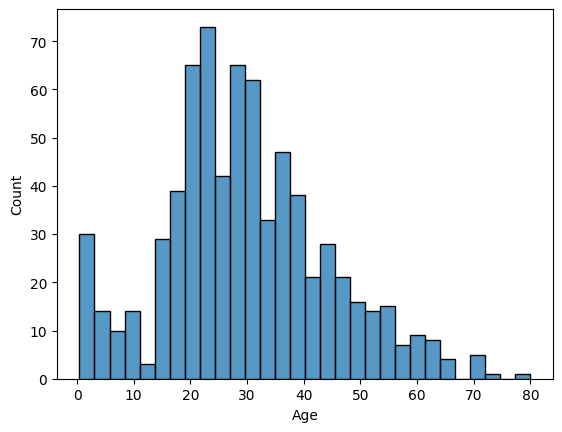

In [57]:
sns.histplot(df['Age'], bins=30)

In [58]:
df1['AgeGroup'] = pd.cut(
    df1['Age'],
    bins=[0, 12, 18, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

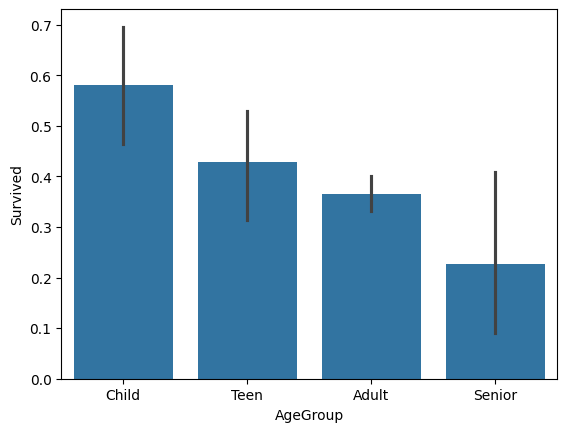

In [59]:
sns.barplot(x='AgeGroup', y='Survived', data=df1)

Younger passengers show higher survival rates compared to adults and seniors, indicating age-related survival differences.

<Axes: ylabel='Fare'>

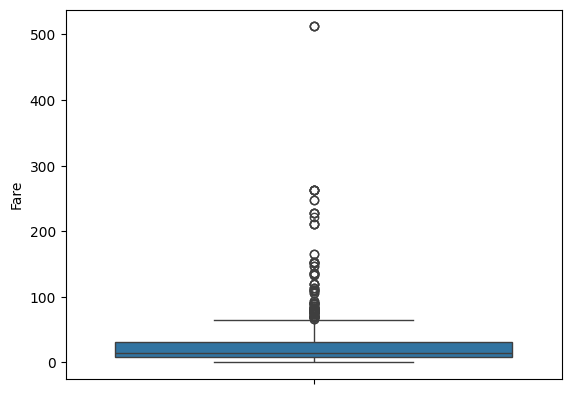

In [60]:
sns.boxplot(df['Fare'])

<Axes: xlabel='FareBin', ylabel='Survived'>

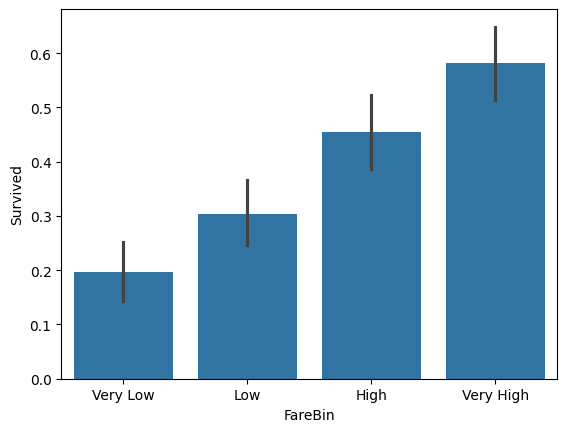

In [61]:
df1['FareBin'] = pd.qcut(
    df1['Fare'],
    4,
    labels=['Very Low','Low','High','Very High']
)
sns.barplot(x='FareBin', y='Survived', data=df1)


Survival probability increases consistently with higher fare categories, indicating that passengers who paid higher fares had better survival outcomes.

In [62]:
df1['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='Survived'>

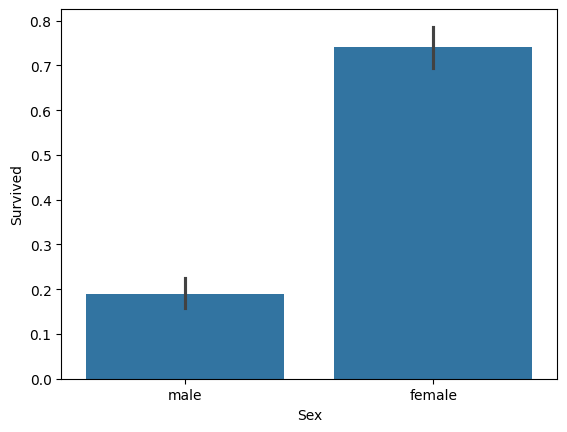

In [63]:
sns.barplot(x='Sex', y='Survived', data=df1)

Female passengers had a significantly higher survival rate than male passengers, making sex one of the strongest predictors of survival.

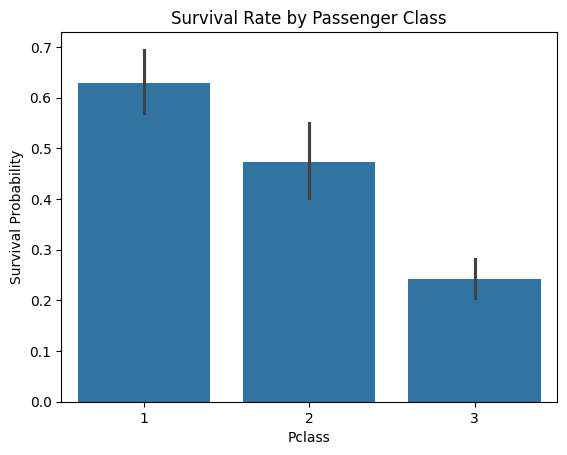

In [64]:
sns.barplot(x='Pclass', y='Survived', data=df1)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

Passengers in 1st class had the highest survival rate, while 3rd class passengers had the lowest, indicating socio-economic status strongly influenced survival.

In [65]:
df1['Embarked'] = df1['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
})

<Axes: xlabel='Embarked', ylabel='Survived'>

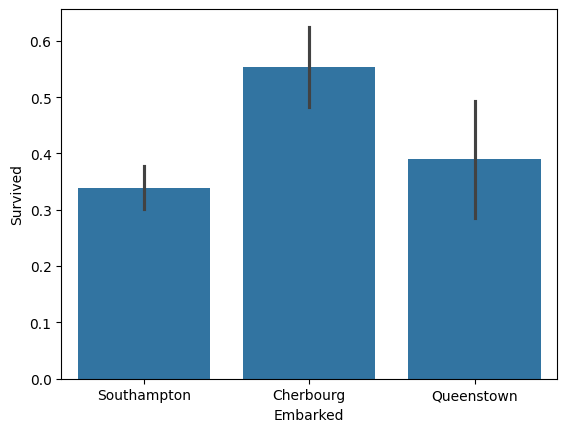

In [66]:
sns.barplot(x='Embarked', y='Survived', data=df1)

<Axes: xlabel='Embarked', ylabel='count'>

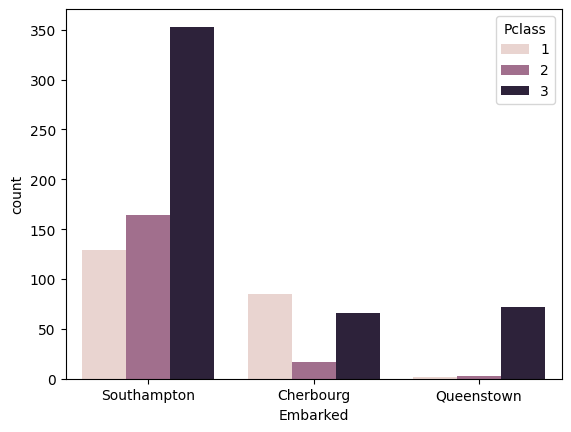

In [67]:
sns.countplot(x='Embarked', hue='Pclass', data=df1)


Passengers embarking from Cherbourg show higher survival rates largely because this port had a higher proportion of first-class passengers compared to Southampton and Queenstown.

<Axes: xlabel='IsAlone', ylabel='Survived'>

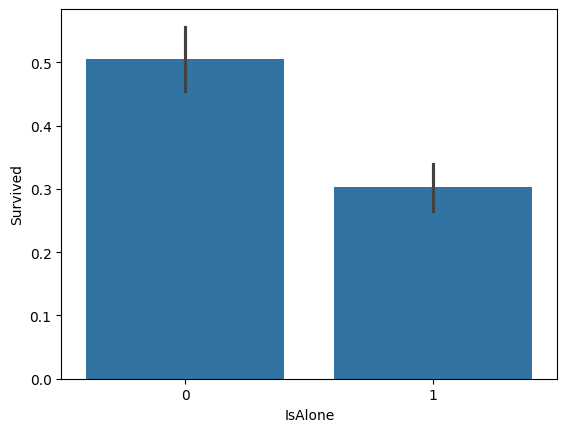

In [68]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1['IsAlone'] = (df1['FamilySize'] == 1).astype(int)
sns.barplot(x='IsAlone', y='Survived', data=df1)


In [69]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareBin',
       'FamilySize', 'IsAlone'],
      dtype='object')

In [70]:
df_cleaned = df1.drop(['PassengerId', 'Name', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize'], axis=1)

In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Embarked  891 non-null    object  
 4   AgeGroup  891 non-null    category
 5   FareBin   891 non-null    category
 6   IsAlone   891 non-null    int64   
dtypes: category(2), int64(3), object(2)
memory usage: 37.1+ KB


Since all continuous variables were discretized into categorical bins and the remaining numeric features were ordinal or binary, scaling was not required.

OneHotEncoding

In [72]:
dummies = pd.get_dummies(
    df_cleaned[['Sex', 'Embarked', 'AgeGroup', 'FareBin']],
    drop_first=True
)

dummies

,Sex_male,Embarked_Queenstown,Embarked_Southampton,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,FareBin_Low,FareBin_High,FareBin_Very High
0,True,False,True,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,True,False,True,False,True,False,False
3,False,False,True,False,True,False,False,False,True
4,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,True,False,True,False,True,False,True,False,False
887,False,False,True,False,True,False,False,True,False
888,False,False,True,False,True,False,False,True,False
889,True,False,False,False,True,False,False,True,False


In [73]:
df2 = df_cleaned.drop(['Sex', 'Embarked', 'AgeGroup', 'FareBin'], axis=1)
df2 = pd.concat([df2, dummies], axis=1)
df2

,Survived,Pclass,IsAlone,Sex_male,Embarked_Queenstown,Embarked_Southampton,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,FareBin_Low,FareBin_High,FareBin_Very High
0,0,3,0,True,False,True,False,True,False,False,False,False
1,1,1,0,False,False,False,False,True,False,False,False,True
2,1,3,1,False,False,True,False,True,False,True,False,False
3,1,1,0,False,False,True,False,True,False,False,False,True
4,0,3,1,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,True,False,True,False,True,False,True,False,False
887,1,1,1,False,False,True,False,True,False,False,True,False
888,0,3,0,False,False,True,False,True,False,False,True,False
889,1,1,1,True,False,False,False,True,False,False,True,False


Model Selection

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [75]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=69,
    stratify=y
)


In [77]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=69)
}

In [78]:
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear'],
        'penalty': ['l2']
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }
}


I used GridSearchCV with StratifiedKFold to ensure consistent class distribution across all cross-validation folds.

In [79]:
best_models = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV with StratifiedKFold for {model_name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=skf,                    # ✅ Stratified CV here
        scoring='roc_auc',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models[model_name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

    print(f"{model_name} best ROC-AUC: {grid.best_score_:.4f}")
    print(f"Best Params: {grid.best_params_}")
    print("-" * 50)


Running GridSearchCV with StratifiedKFold for LogisticRegression...
LogisticRegression best ROC-AUC: 0.8460
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
--------------------------------------------------
Running GridSearchCV with StratifiedKFold for RandomForest...
RandomForest best ROC-AUC: 0.8591
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
--------------------------------------------------


After hyperparameter tuning using GridSearchCV with stratified cross-validation, Random Forest achieved the highest ROC-AUC score (0.859) compared to Logistic Regression (0.846), and was selected as the final model

In [80]:
final_model = best_models['RandomForest']['best_estimator']
final_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=69)

Model Evaluation

In [81]:
from sklearn.metrics import roc_auc_score, classification_report

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prob)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



Saveing the Model

In [82]:
import joblib
joblib.dump(final_model, 'titanic_model.pkl')

['titanic_model.pkl']